In [1]:
# データ読み込み
import pandas as pd
import numpy as np
 
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

### ・PassengerId – 乗客識別ユニークID
### ・Survived – 生存フラグ（0=死亡、1=生存）
### ・Pclass – チケットクラス
### ・Name – 乗客の名前
### ・Sex – 性別（male=男性、female＝女性）
### ・Age – 年齢
### ・SibSp – タイタニックに同乗している兄弟/配偶者の数
### ・parch – タイタニックに同乗している親/子供の数
### ・ticket – チケット番号
### ・fare – 料金
### ・cabin – 客室番号
### ・Embarked – 出港地（タイタニックへ乗った港）

#### pclass = チケットクラス

#### 1 = 上層クラス（お金持ち）
#### 2 = 中級クラス（一般階級）
#### 3 = 下層クラス（労働階級）

#### Embarked = 各変数の定義は下記の通り

#### C = Cherbourg
#### Q = Queenstown
#### S = Southampton

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 各データセットの基本統計量の確認
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# データセットの欠損の確認
def kesson_table(df): 
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0 : '欠損数', 1 : '%'})
    return kesson_table_ren_columns

In [8]:
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [9]:
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [10]:
# 欠損データを代理データに入れ替える
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [11]:
# 文字列カテゴリカルデータを数字へ変換
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
train.head(10)

<ipython-input-11-755e6be2e847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "male"] = 0
<ipython-input-11-755e6be2e847>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"][train["Sex"] == "female"] = 1
<ipython-input-11-755e6be2e847>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Embarked"][train["Embarked"] == "S" ] = 0
<ipython-input-11-755e6be2e847>:5: SettingWithCopyWarning: 
A v

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [12]:
# testデータも同様に処理する
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
test.Fare[152] = test.Fare.median()
test.head(10)

<ipython-input-12-40002c04473c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"][test["Sex"] == "male"] = 0
<ipython-input-12-40002c04473c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"][test["Sex"] == "female"] = 1
<ipython-input-12-40002c04473c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Embarked"][test["Embarked"] == "S"] = 0
<ipython-input-12-40002c04473c>:6: SettingWithCopyWarning: 
A value is

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


In [23]:
# 予測モデル その1 「決定木」
# scikit-learnのインポートをします
from sklearn import tree

# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(test_features)


In [24]:
# 予測データのサイズを確認
my_prediction.shape

(418,)

In [25]:
#予測データの中身を確認
print(my_prediction)

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [26]:
# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])

In [29]:
#予測モデル その2 「決定木 + 7つの説明変数」
# 追加となった項目も含めて予測モデルその2で使う値を取り出す
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values
# 決定木の作成とアーギュメントの設定
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

In [30]:
# tsetから「その2」で使う項目の値を取り出す
test_features_2 = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
# 「その2」の決定木を使って予測をしてCSVへ書き出す
my_prediction_tree_two = my_tree_two.predict(test_features_2)
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution_tree_two = pd.DataFrame(my_prediction_tree_two, PassengerId, columns = ["Survived"])
my_solution_tree_two.to_csv("my_tree_two.csv", index_label = ["PassengerId"])

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier # K近傍法
from sklearn.svm import SVC # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.naive_bayes import GaussianNB # ナイーブ・ベイズ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # 線形判別分析

In [27]:
names = ["Logistic Regression", "Nearest Neighbors", 
         "Linear SVM", "Polynomial SVM", "RBF SVM", "Sigmoid SVM", 
         "Decision Tree","Random Forest", "AdaBoost", "Naive Bayes", 
         "Linear Discriminant Analysis"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="poly"),
    SVC(kernel="rbf"),
    SVC(kernel="sigmoid"),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA()]

In [30]:
# 機械学習で２値分類　その１
# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features_one, target, test_size=.4) # 訓練データ・テストデータへのランダムな分割

In [33]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(X_train, y_train) # 学習
    score1 = clf.score(X_train, y_train) # 正解率（train）の算出
    score2 = clf.score(X_test, y_test) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

In [34]:
df_result

,train,test
Random Forest,0.985019,0.792717
Linear Discriminant Analysis,0.797753,0.784314
Logistic Regression,0.803371,0.778711
Linear SVM,0.792135,0.778711
AdaBoost,0.852060,0.770308
Naive Bayes,0.780899,0.767507
Decision Tree,0.985019,0.750700
Nearest Neighbors,0.797753,0.689076
RBF SVM,0.698502,0.649860
Polynomial SVM,0.653558,0.635854


<AxesSubplot:>

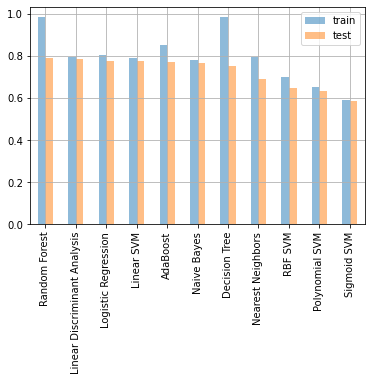

In [35]:
# 棒グラフの描画
df_result.plot(kind='bar', alpha=0.5, grid=True)

In [36]:
# 機械学習で２値分類　その2
target = train["Survived"].values
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features_two, target, test_size=.2) # 訓練データ・テストデータへのランダムな分割

In [52]:
result = []
for name, clf in zip(names, classifiers): # 指定した複数の分類機を順番に呼び出す
    clf.fit(X_train, y_train) # 学習
    score1 = clf.score(X_train, y_train) # 正解率（train）の算出
    score2 = clf.score(X_test, y_test) # 正解率（test）の算出
    result.append([score1, score2]) # 結果の格納

# test の正解率の大きい順に並べる
df_result = pd.DataFrame(result, columns=['train', 'test'], index=names).sort_values('test', ascending=False)

/Users/asanomitsuaki/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
df_result

,train,test
Logistic Regression,0.796348,0.832402
Linear Discriminant Analysis,0.799157,0.821229
Random Forest,0.985955,0.815642
Naive Bayes,0.789326,0.798883
AdaBoost,0.835674,0.793296
Linear SVM,0.787921,0.782123
Decision Tree,0.985955,0.770950
RBF SVM,0.682584,0.670391
Nearest Neighbors,0.794944,0.664804
Polynomial SVM,0.660112,0.659218


<AxesSubplot:>

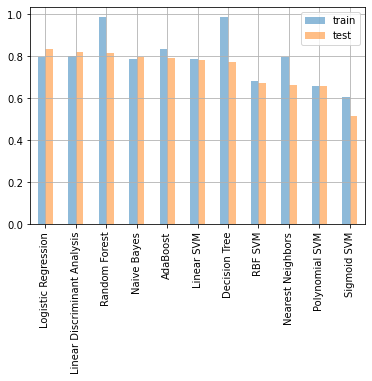

In [54]:
# 棒グラフの描画
df_result.plot(kind='bar', alpha=0.5, grid=True)